<a href="https://colab.research.google.com/github/Orrm23/DeepSeek-Coder/blob/main/Decceleration_analysisof_athelete_using_LSTM_real_world_project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6656 - loss: 0.6481 - val_accuracy: 0.6670 - val_loss: 0.6271
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6743 - loss: 0.6228 - val_accuracy: 0.6670 - val_loss: 0.6166
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6601 - loss: 0.6213 - val_accuracy: 0.6820 - val_loss: 0.5975
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6579 - loss: 0.6192 - val_accuracy: 0.6800 - val_loss: 0.5720
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6803 - loss: 0.5896 - val_accuracy: 0.6830 - val_loss: 0.5519
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6937 - loss: 0.5628 - val_accuracy: 0.6500 - val_loss: 0.5887
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7021 - loss: 0.5405 - val_accuracy: 0.7390 - val_loss: 0.4979
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7465 - loss: 0.4933 - val_accuracy: 0.7320 - val_

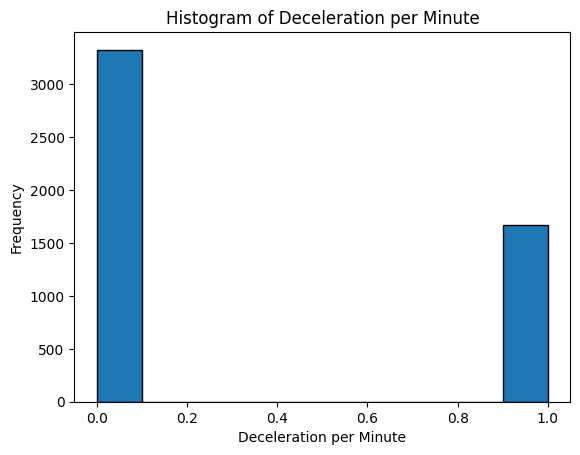

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset from CSV file
def load_rpm_data(file_path):
    df = pd.read_csv('rpm_deceleration_dataset.csv')
    X = df.iloc[:, :-1].values  # Features (RPM data sequences)
    y = df.iloc[:, -1].values   # Labels (1 for deceleration, 0 otherwise)
    return X, y

# File path to dataset
file_path = r"E:\Decceleration_analysisof_athelete using LSTM real world project6\rpm_deceleration_dataset.csv"

# Prepare dataset
X, y = load_rpm_data(file_path)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot histogram for deceleration per minute
plt.hist(y, bins=10, edgecolor='black')
plt.xlabel("Deceleration per Minute")
plt.ylabel("Frequency")
plt.title("Histogram of Deceleration per Minute")
plt.show()
